
# Name: Sugam Jain

### Problem statement: Train a Machine Learning model to distinguish between different species of the Iris flower based on four measurements (features): sepal length, sepal width, petal length, and petal width.

### Dataset: http://archive.ics.uci.edu/ml/datasets/Iris

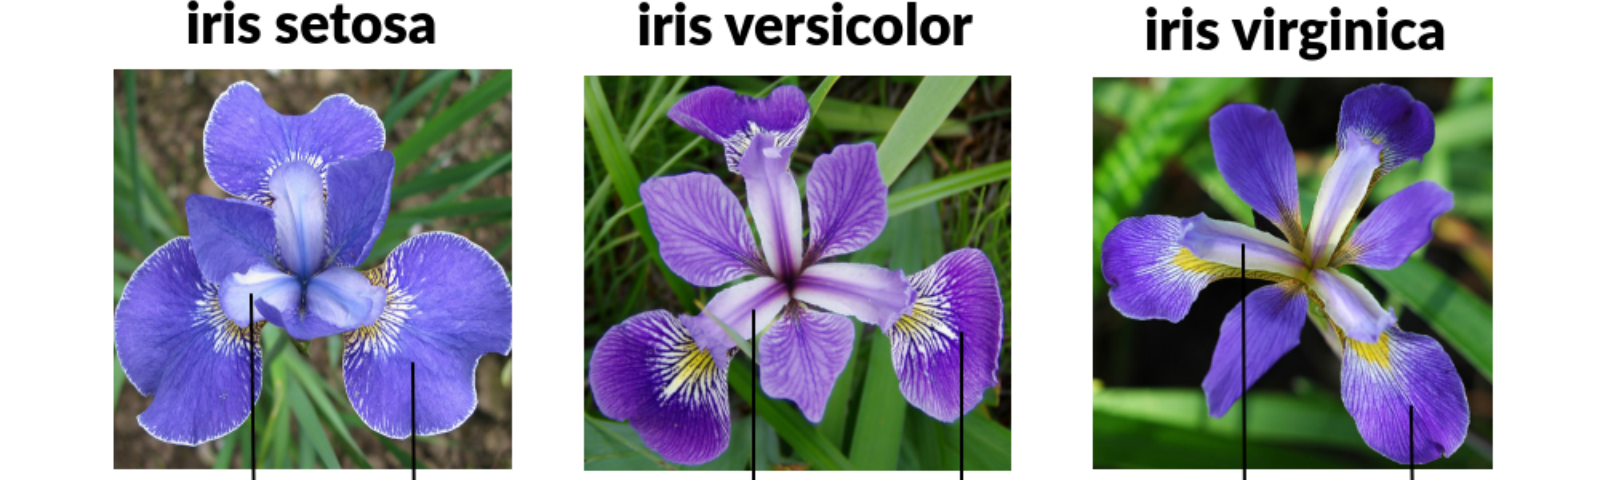

### Importing the requried libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(style='darkgrid')

### Reading the dataset

In [2]:
iris=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

### Displaying the top and lower 5 values

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Description of the dataset

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Basic info of the dataset

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for any null values

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Checking for any duplicate values

In [8]:
iris.duplicated().sum()

3

### Shape of the dataset

In [9]:
iris.shape

(150, 5)

### Columns of the dataset

In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Correlation b/w features

In [11]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Using pandas profiling to create a report of the dataset

In [12]:
import pandas_profiling
iris.profile_report()

### Visualizing the dataset to extract more info and find trends

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

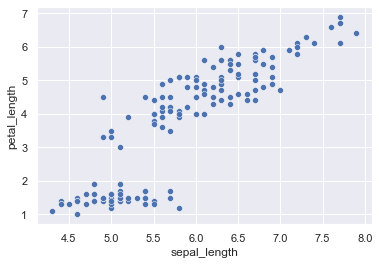

In [13]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

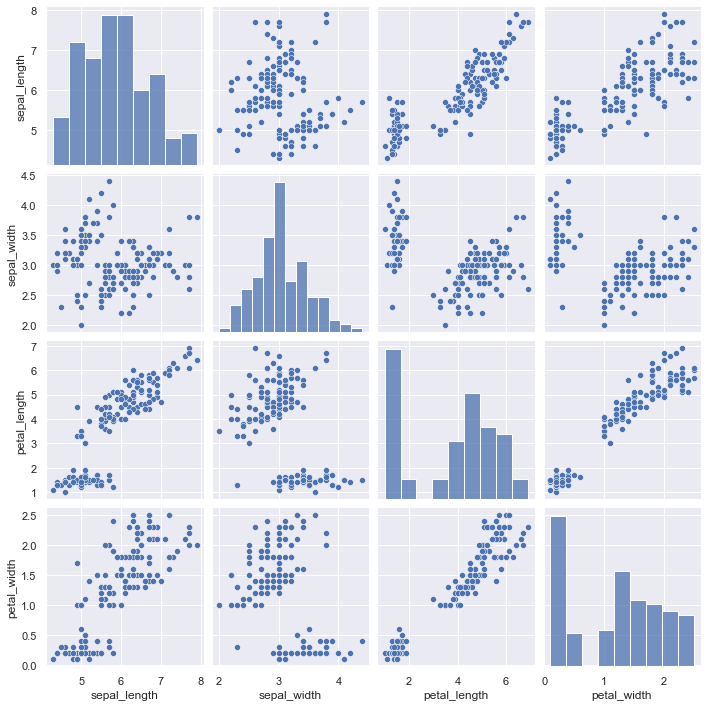

In [14]:
sns.pairplot(iris)

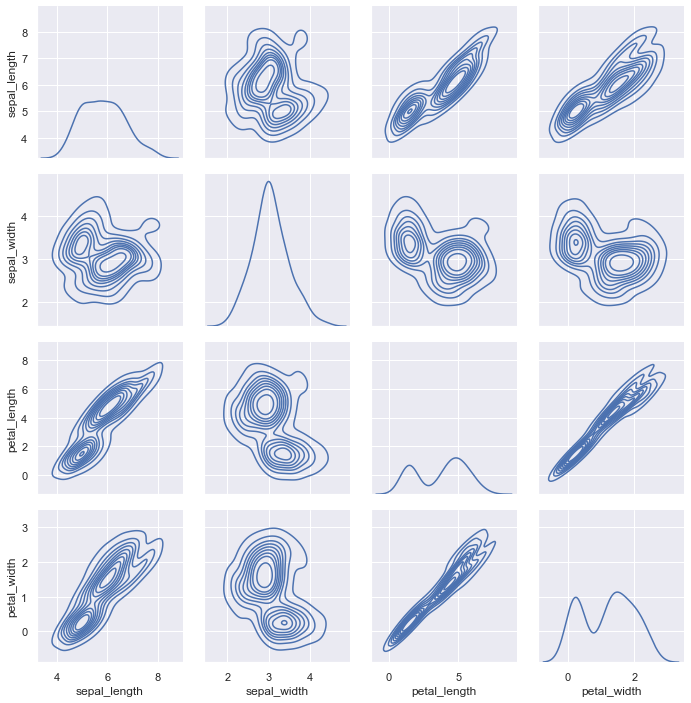

In [15]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

Text(0, 0.5, 'Y Axis')

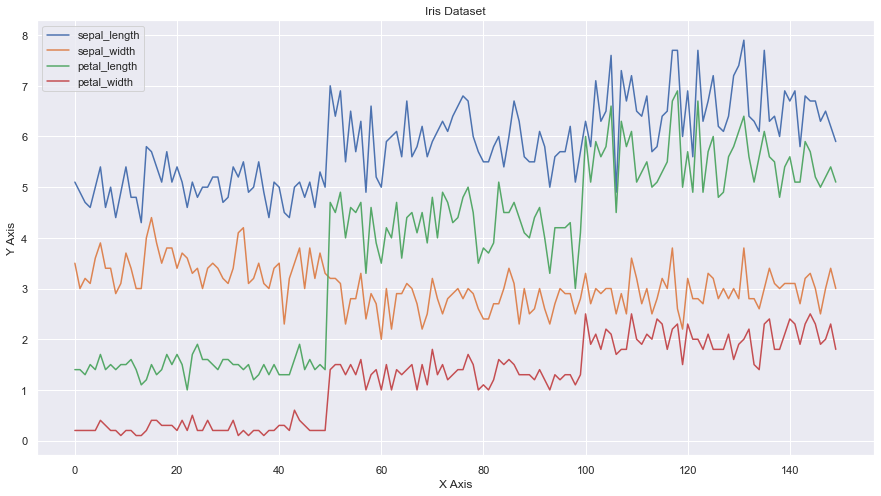

In [16]:
ax = iris.plot(figsize=(15,8), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

In [17]:
df = iris.drop(['species'], axis = 1)

In [18]:
df.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

<AxesSubplot:>

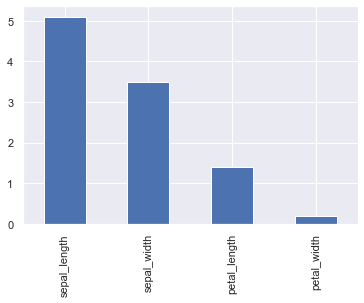

In [19]:
df.iloc[0].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

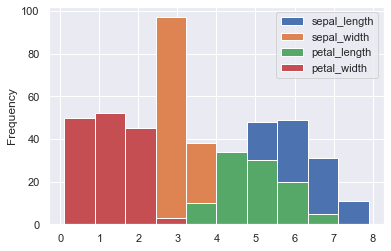

In [20]:
iris.plot.hist()

<AxesSubplot:ylabel='Frequency'>

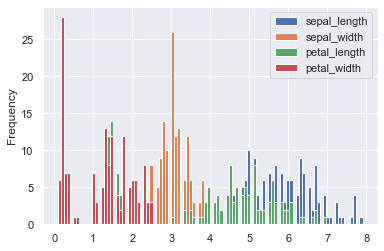

In [21]:
iris.plot(kind = 'hist', stacked = False, bins = 100)

In [22]:
iris['sepal_width'].diff()

0      NaN
1     -0.5
2      0.2
3     -0.1
4      0.5
      ... 
145   -0.3
146   -0.5
147    0.5
148    0.4
149   -0.4
Name: sepal_width, Length: 150, dtype: float64

<AxesSubplot:ylabel='Frequency'>

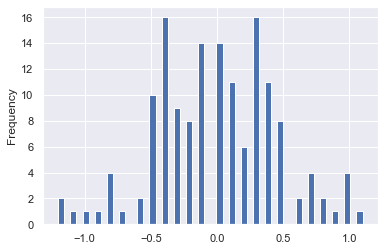

In [23]:
iris['sepal_width'].diff().plot(kind = 'hist', stacked = True, bins = 50)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

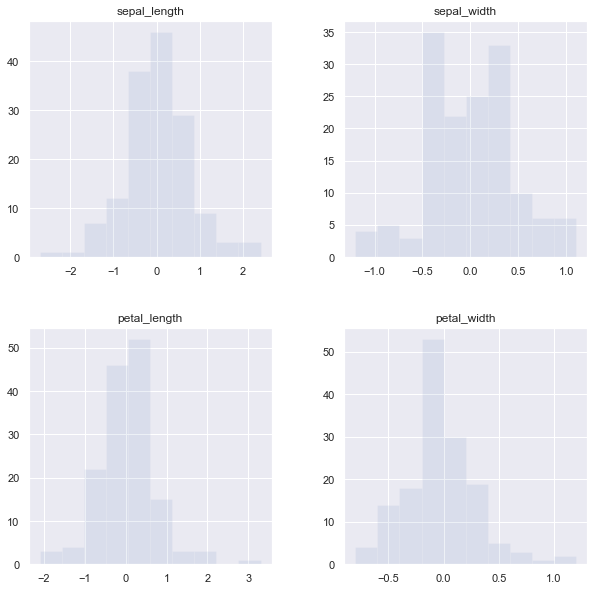

In [24]:
df.diff().hist(color = 'b', alpha = 0.1, figsize=(10,10))

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

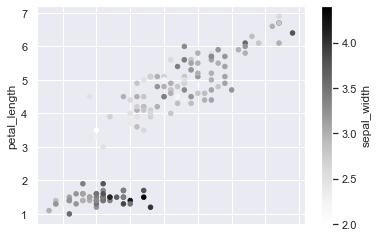

In [25]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

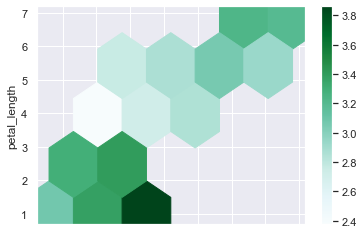

In [26]:
df.plot.hexbin(x = 'sepal_length', y = 'petal_length', gridsize = 5, C = 'sepal_width')

In [27]:
d = df.iloc[0]
d

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

<AxesSubplot:ylabel='0'>

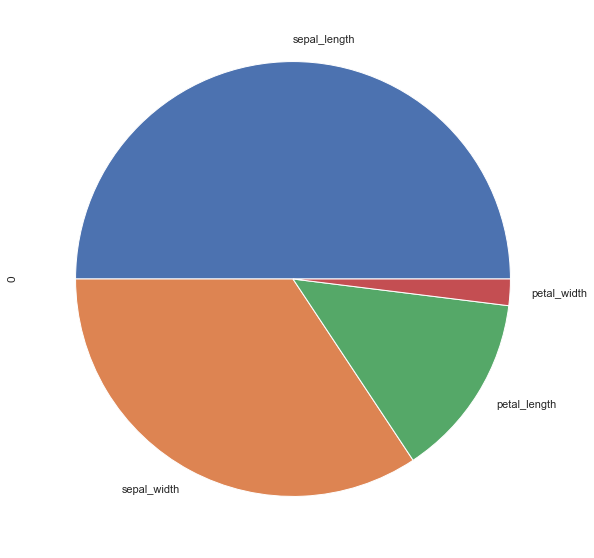

In [28]:
d.plot.pie(figsize = (10,10))

In [30]:
d = df.head(3).T
d

,0,1,2
sepal_length,5.1,4.9,4.7
sepal_width,3.5,3.0,3.2
petal_length,1.4,1.4,1.3
petal_width,0.2,0.2,0.2


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>,
       <AxesSubplot:ylabel='2'>], dtype=object)

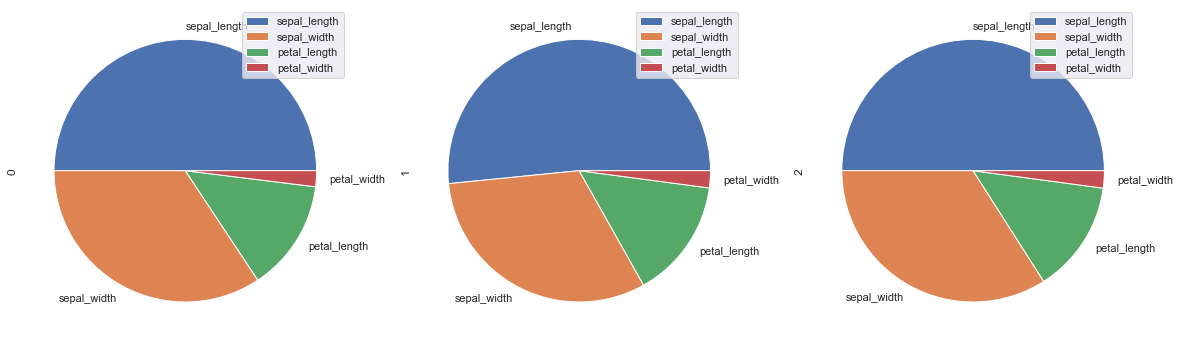

In [31]:
d.plot.pie(subplots = True, figsize = (20, 20))

In [32]:
from pandas.plotting import scatter_matrix

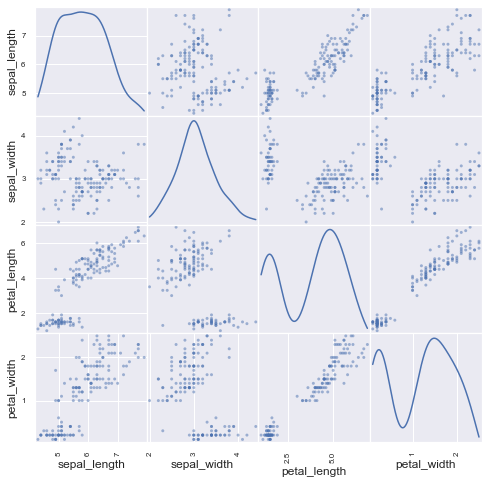

In [33]:
scatter_matrix(df, figsize= (8,8), diagonal='kde', color = 'b')
plt.show()

In [34]:
from pandas.plotting import andrews_curves

<AxesSubplot:>

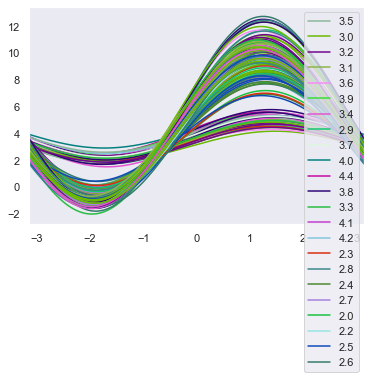

In [35]:
andrews_curves(df, 'sepal_width')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

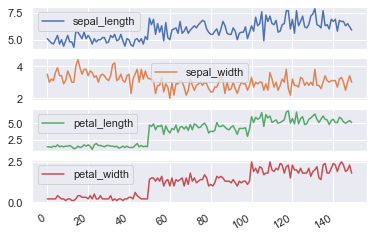

In [37]:
df.plot(subplots = True)

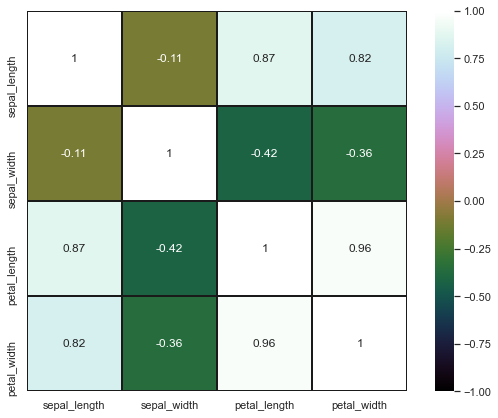

In [38]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

### Importing the required libraries for model building

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

### Train test split

In [40]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [43]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [45]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width','petal_length',
                 'petal_width']]
test_y = test.species

### Using Logistic Regression

In [46]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


C:\Users\atish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Using Support Vector

In [48]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9736842105263158


### Using KNN 

In [49]:
#Using KNN 
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9736842105263158


### Using Gaussian NB

In [50]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 1.0


### Using Decision Tree

In [51]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


### Results - accuracy of all the models

In [52]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


### Conclusion

In this notebook, I have approached by anayzing data sets to summarize their main characteristics by using statistical graphics and other data visualization methods and built different ML models on the dataset. We can see that Logistic Regression, SVM classifier, Naive Bayes and KNN are giving an accuracy of 94.7% while Decision Tree is 92% accurate.